In [1]:
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from skimage import data
from skimage import color
from skimage.util import view_as_blocks
from skimage import io

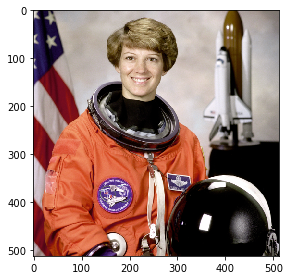

In [3]:
img = data.astronaut()
io.imshow(img)

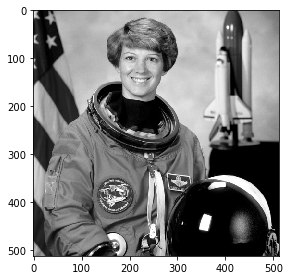

In [4]:
# make it grayscale
gray = color.rgb2gray(img)
io.imshow(gray)

In [5]:
# see img as a matrix of blocks (of block_shape)
block_shape = (4, 4)
view = view_as_blocks(gray, block_shape)
view.shape

(128, 128, 4, 4)

In [6]:
# collape last 2 dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
flatten_view.shape

(128, 128, 16)

In [7]:
# resampling by taking either mean, max or meadian of each block
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)

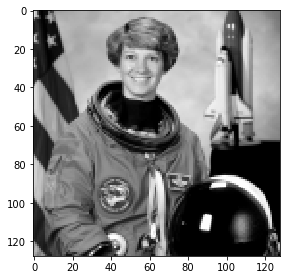

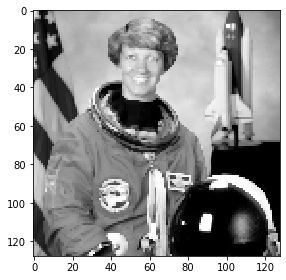

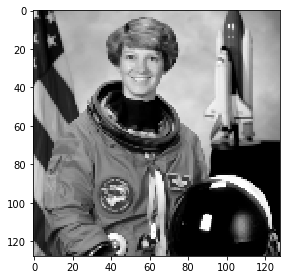

In [8]:
io.imshow(mean_view)
io.show()
io.imshow(max_view)
io.show()
io.imshow(median_view)
io.show()

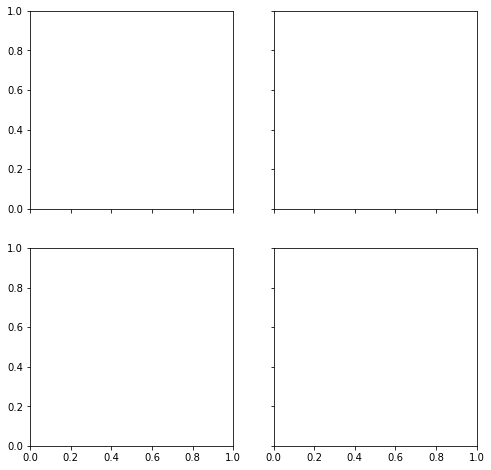

In [9]:
# display resampled images
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

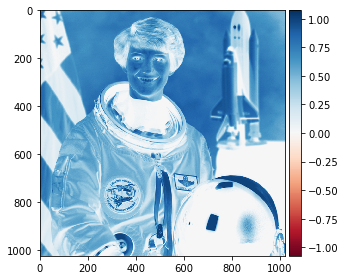

In [10]:
gray_resized = ndi.zoom(gray, 2, order=3)
io.imshow(gray_resized)

In [13]:
ax[0].set_title("Orginal rescaled with\n spline interpolation (order=3)")
ax[0].imshow(gray_resized, extent=(-0.5, 128.5, 128.5, -0.5), cmap=cm.Greys_r)
ax[1].set_title("Block view with\n local mean pooling")
ax[1].imshow(mean_view, cmap=cm.Greys_r)
ax[2].set_title("Block view with\n local mean pooling")
ax[2].imshow(max_view, cmap=cm.Greys_r)
ax[3].set_title("Blocks view with\n local meadian pooling")
ax[3].imshow(median_view, cmap=cm.Greys_r)

for a in ax:
    a.set_axis_off()
    
fig.tight_layout()
plt.show()